In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
#Ładowanie danych
raw = load_iris()
data = raw['data']
target = raw['target']
feature_names = raw['feature_names']
target_names = raw['target_names']
data = np.array(data[:,:2])
target = np.array(list(map(int,target)))

In [3]:
#Podział na dane treningowe i testowe
X_train,X_test,Y_train,Y_test = train_test_split(data,target)

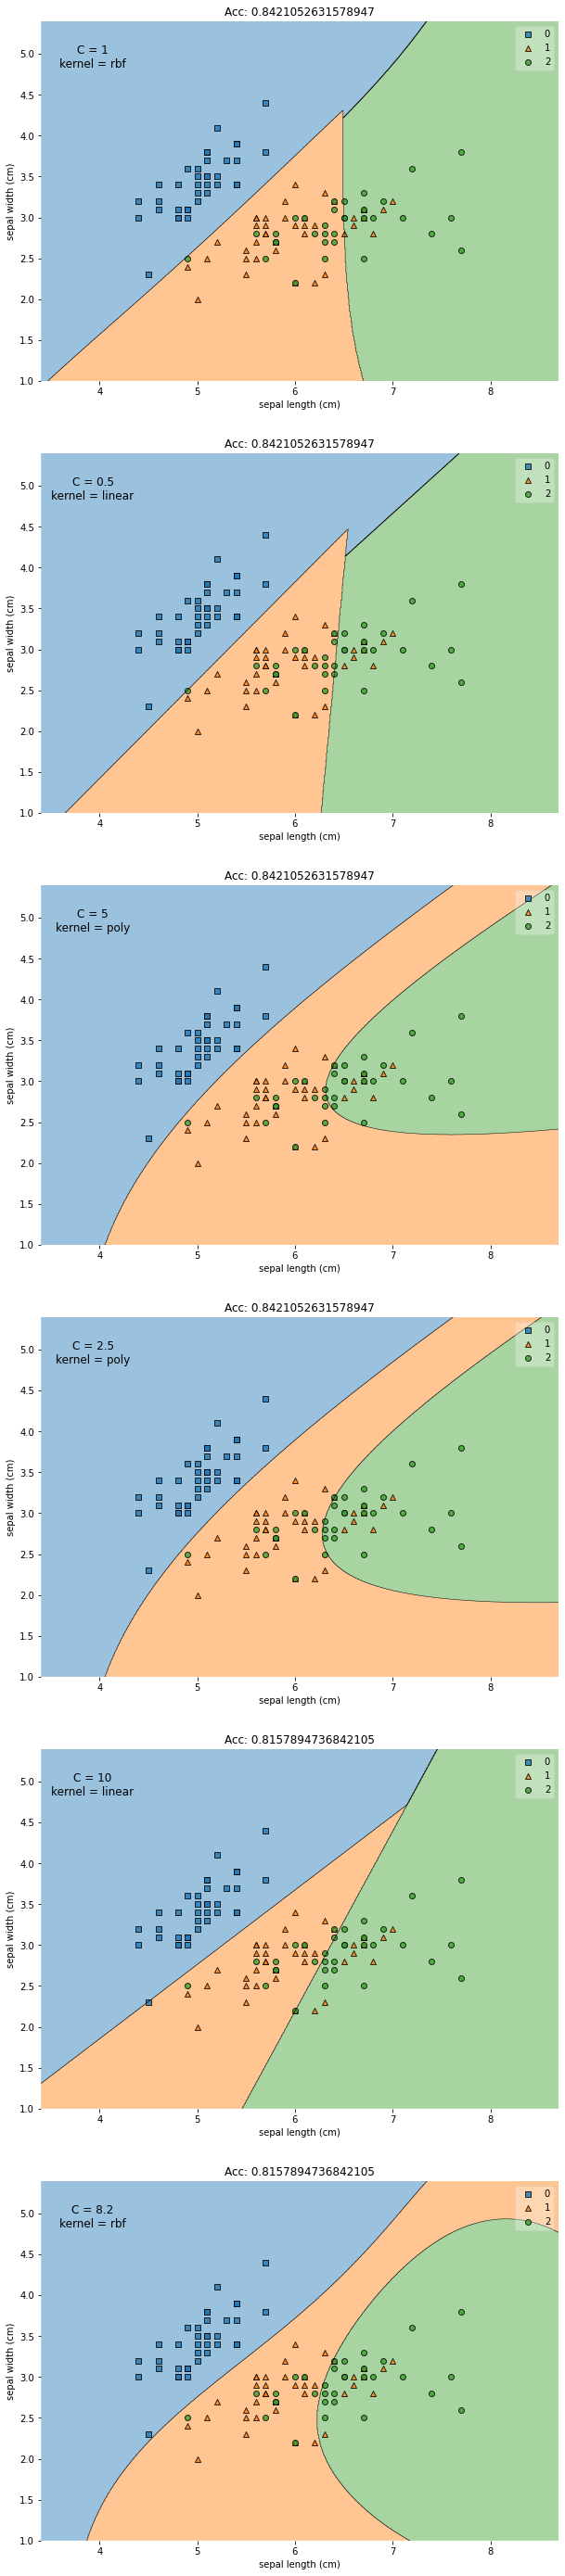

In [4]:
#Tworzenie wykresów
fig, ax = plt.subplots(6,figsize=(10,50))
var = [(1,'rbf'),(0.5,'linear'),(5,'poly'),(2.5,'poly'),(10,'linear'),(8.2,'rbf')]
for i in range(6):
	C,kernel = var[i]
	svc = SVC(C=C,kernel=kernel)
	svc.fit(X_train,Y_train)
	acc = svc.score(X_test,Y_test)
	plot_decision_regions(X_train,Y_train,svc,ax=ax[i])
	ax[i].set(xlabel=feature_names[0],ylabel=feature_names[1],title =f"Acc: {acc}")
	ax[i].text(0.1, 0.9, f"C = {C}\nkernel = {kernel}", horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes,fontsize = 12)
plt.show()